## A1/IC analysis for pupil/behavior paper
by DS, ZS, CH, SVD

#### 2018/12 first created by DS
#### 2019/07/23 last check 

**This notebook contains code to generate panels is Figure 3A - Pie charts**


In [2]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl

from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

#color_b = '#82418B' #dark purple 
color_b = '#C768D8'
#color_p = '#2E7E3E' #dark green
color_p = '#4ED163'
color_both = 'black'
color_either = '#595959'
color_ns = 'lightgrey'

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 60)

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-07-23 162141.log


In [3]:
# Load relevant data frame: PTD_data_metadata.csv
# UPDATE 2019/07/23 DS: I don't remember where I generated this csv. Possibly after all data
# manipulation in ACIC_analysis_fig3-4? 
df = pd.read_csv('PTD_data_metadata.csv')

In [4]:
df.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,area,sign,experimenter,onBF,SU,animal,task,bestsnr,bestbf,PASSIVE_0_snr,PASSIVE_0_bf,PASSIVE_0,ACTIVE_1_snr,ACTIVE_1_bf,ACTIVE_1,ACTIVE_1_tf,ACTIVE_1_tardist,PASSIVE_1_snr,...,ACTIVE_3,ACTIVE_3_tf,ACTIVE_3_tardist,ACTIVE_0_snr,ACTIVE_0_bf,ACTIVE_0,ACTIVE_0_tf,ACTIVE_0_tardist,PASSIVE_2_snr,PASSIVE_2_bf,PASSIVE_2,PASSIVE_3_snr,PASSIVE_3_bf,PASSIVE_3,ACTIVE_4_snr,ACTIVE_4_bf,ACTIVE_4,ACTIVE_4_tf,ACTIVE_4_tardist,PASSIVE_4_snr,PASSIVE_4_bf,PASSIVE_4,R2_diff,MIbeh_only,MIbeh_unique,sig_ubeh,sig_upup,sig_state,R2beh_unique,R2pup_unique
0,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,95.4293,0.452884,0.025611,0.026288,1.022688,baseline,0.205103,A1,TBD,DS,False,True,BRT,TIN,0.97222,816,0.46839,735,BRT039c05_p_PTD.m,0.56382,816.0,BRT039c06_a_PTD.m,5000.0,-2.6153,0.97222,...,NaN,NaN,NaN,0.50432,1480.0,BRT039c04_a_PTD.m,5000.0,-2.6153,0.63875,3809.0,BRT039c09_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002601,-0.020993,-0.007225,False,False,False,-0.000432,0.00276
1,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.010855,95.4293,0.452884,0.025611,0.013340,0.027984,pupil,0.205103,A1,TBD,DS,False,True,BRT,TIN,0.97222,816,0.46839,735,BRT039c05_p_PTD.m,0.56382,816.0,BRT039c06_a_PTD.m,5000.0,-2.6153,0.97222,...,NaN,NaN,NaN,0.50432,1480.0,BRT039c04_a_PTD.m,5000.0,-2.6153,0.63875,3809.0,BRT039c09_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002601,-0.020993,-0.007225,False,False,False,-0.000432,0.00276
2,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,-0.000702,95.4293,0.452884,0.025611,0.031175,0.021035,active,0.205103,A1,TBD,DS,False,True,BRT,TIN,0.97222,816,0.46839,735,BRT039c05_p_PTD.m,0.56382,816.0,BRT039c06_a_PTD.m,5000.0,-2.6153,0.97222,...,NaN,NaN,NaN,0.50432,1480.0,BRT039c04_a_PTD.m,5000.0,-2.6153,0.63875,3809.0,BRT039c09_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002601,-0.020993,-0.007225,False,False,False,-0.000432,0.00276
3,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,95.4293,0.452708,0.025073,0.047462,0.996078,baseline,0.204945,A1,TBD,DS,False,True,BRT,TIN,0.97222,816,0.46839,735,BRT039c05_p_PTD.m,0.56382,816.0,BRT039c06_a_PTD.m,5000.0,-2.6153,0.97222,...,NaN,NaN,NaN,0.50432,1480.0,BRT039c04_a_PTD.m,5000.0,-2.6153,0.63875,3809.0,BRT039c09_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002601,-0.020993,-0.007225,False,False,False,-0.000432,0.00276
4,BRT039c-40-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,0.013942,95.4293,0.452708,0.025073,0.014610,0.060707,pupil,0.204945,A1,TBD,DS,False,True,BRT,TIN,0.97222,816,0.46839,735,BRT039c05_p_PTD.m,0.56382,816.0,BRT039c06_a_PTD.m,5000.0,-2.6153,0.97222,...,NaN,NaN,NaN,0.50432,1480.0,BRT039c04_a_PTD.m,5000.0,-2.6153,0.63875,3809.0,BRT039c09_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002601,-0.020993,-0.007225,False,False,False,-0.000432,0.00276


In [6]:
# creating list of booleans to mask A1, IC, onBF and offBF out of big df
is_active = (df['state_chan']=='active')
full_model = (df['state_sig']=='st.pup.beh')
null_model = (df['state_sig']=='st.pup0.beh0')
part_beh_model = (df['state_sig']=='st.pup0.beh')
part_pup_model = (df['state_sig']=='st.pup.beh0')

A1 = df['area']=='A1'
ICC = df['area']=='ICC'
ICX = df['area']=='ICX'
onBF = df['onBF']==True
offBF = df['onBF']==False
SU = df['SU']==True
sig_ubeh = df['sig_ubeh']==True
sig_upup = df['sig_upup']==True
sig_both = sig_ubeh & sig_upup
sig_state = df['sig_state']==True

In [7]:
# A1

A1_n_sig_both = len(df[full_model & is_active & A1 & sig_both])
A1_n_sig_ubeh = len(df[full_model & is_active & A1 & sig_ubeh]) - A1_n_sig_both
A1_n_sig_upup = len(df[full_model & is_active & A1 & sig_upup]) - A1_n_sig_both
A1_n_sig_state = len(df[full_model & is_active & A1 & sig_state])
A1_n_sig_either = A1_n_sig_state - (A1_n_sig_both + A1_n_sig_ubeh + A1_n_sig_upup)

A1_n_total = len(df[full_model & is_active & A1])
A1_n_not_sig = A1_n_total - (A1_n_sig_state)

A1_units = [A1_n_sig_ubeh, A1_n_sig_upup, A1_n_sig_both, A1_n_sig_either, A1_n_not_sig]

# IC

IC_n_sig_both = len(df[full_model & is_active & (ICC | ICX) & sig_both])
IC_n_sig_ubeh = len(df[full_model & is_active & (ICC | ICX) & sig_ubeh]) - IC_n_sig_both
IC_n_sig_upup = len(df[full_model & is_active & (ICC | ICX) & sig_upup]) - IC_n_sig_both
IC_n_sig_state = len(df[full_model & is_active & (ICC | ICX) & sig_state])
IC_n_sig_either = IC_n_sig_state - (IC_n_sig_both + IC_n_sig_ubeh + IC_n_sig_upup)

IC_n_total = len(df[full_model & is_active & (ICC | ICX)])
IC_n_not_sig = IC_n_total - (IC_n_sig_state)

IC_units = [IC_n_sig_ubeh, IC_n_sig_upup, IC_n_sig_both, IC_n_sig_either, IC_n_not_sig]
colors = [color_b, color_p, color_both, color_either, color_ns]


In [8]:
IC_n_total

66

In [9]:
def donut_plot(area, unit_list, colors, savefigure=False):
    white_circle=plt.Circle((0,0), 0.7, color='white')
    plt.axis('equal')
    plt.pie(unit_list, colors=colors, labels=unit_list)
    p=plt.gcf()
    p.gca().add_artist(white_circle)
    plt.title(area)
    if savefigure:
        plt.savefig(area + '_donut.pdf')

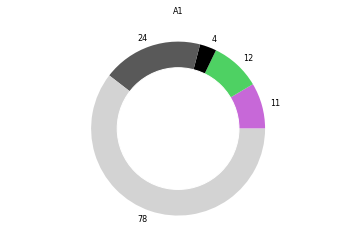

In [10]:
donut_plot('A1', A1_units, colors, savefigure=True)

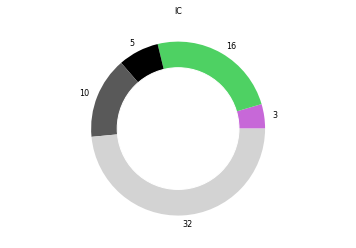

In [11]:
donut_plot('IC', IC_units, colors, savefigure=True)